<a href="https://colab.research.google.com/github/Rido843/Basic-Python-Programming-for-Data-Science/blob/main/UAS_Ekono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
from __future__ import division
import seaborn as sns

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18.5, 10.5

def print_resids(preds, resids):
    ax = sns.regplot(preds, resids);
    ax.set(xlabel = 'Predicted values', ylabel = 'errors', title = 'Predicted values vs. Errors')
    plt.show();

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_excel("Data UAS.xlsx")
data.shape

(34, 11)

In [ ]:
no_null_iv = data[(data['Ketahanan Pangan'].notnull()) & (data['Penduduk Miskin'].notnull()) & 
                    (data['Indeks Pemanfaatan'].notnull()) & (data['Pengeluaran'].notnull()) & (data['Produktivitas Padi'].notnull())
                      & (data['Indeks Keterjangkauan'].notnull())& (data['Listrik'].notnull())]
endog = no_null_iv['Ketahanan Pangan']
exog = no_null_iv[['Penduduk Miskin','Indeks Pemanfaatan', 'Indeks Keterjangkauan']]
instr = no_null_iv[['Produktivitas Padi', 'Pengeluaran', 'Indeks Pemanfaatan','Indeks Keterjangkauan',]]
dep_var_iv = no_null_iv['Ketahanan Pangan']

exog_constant = sm.add_constant(exog)
instr_constant = sm.add_constant(instr)
no_endog_results = IV2SLS(endog, exog_constant, instrument = instr_constant).fit()

no_endog_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:       Ketahanan Pangan   R-squared:                       0.621
Model:                         IV2SLS   Adj. R-squared:                  0.583
Method:                     Two Stage   F-statistic:                     17.36
                        Least Squares   Prob (F-statistic):           1.01e-06
Date:                Fri, 21 Jan 2022                                         
Time:                        02:14:01                                         
No. Observations:                  34                                         
Df Residuals:                      30                                         
Df Model:                           3                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.9019      9.780      0.706      0.486     -13.071      26.875
Penduduk Miskin           0.0038      0.002      1.849      0.074      -0.000       0.008
Indeks Pemanfaatan        0.5082      0.203      2.503      0.018       0.093       0.923
Indeks Keterjangkauan     0.3695      0.171      2.162      0.039       0.021       0.718
==============================================================================
Omnibus:                        2.894   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.641
Skew:                          -0.632   Prob(JB):                        0.267
Kurtosis:                       2.484   Cond. No.                     6.41e+03
==============================================================================
"""

In [ ]:
endog = no_null_iv['Penduduk Miskin']
exog = no_null_iv[['Ketahanan Pangan','Produktivitas Padi', 'Pengeluaran']]
instr = no_null_iv[['Listrik', 'Indeks Keterjangkauan', 'Pengeluaran','Indeks Pemanfaatan',]]
dep_var_iv = no_null_iv['Penduduk Miskin']

exog_constant = sm.add_constant(exog)
instr_constant = sm.add_constant(instr)
no_endog_results = IV2SLS(endog, exog_constant, instrument = instr_constant).fit()

no_endog_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:        Penduduk Miskin   R-squared:                       0.747
Model:                         IV2SLS   Adj. R-squared:                  0.722
Method:                     Two Stage   F-statistic:                     12.64
                        Least Squares   Prob (F-statistic):           1.63e-05
Date:                Fri, 21 Jan 2022                                         
Time:                        02:14:01                                         
No. Observations:                  34                                         
Df Residuals:                      30                                         
Df Model:                           3                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -399.6404   3001.594     -0.133      0.895   -6529.713    5730.432
Ketahanan Pangan      -0.2399     16.284     -0.015      0.988     -33.497      33.017
Produktivitas Padi     0.0003   9.84e-05      2.682      0.012     6.3e-05       0.000
Pengeluaran            6.1958     37.591      0.165      0.870     -70.574      82.966
==============================================================================
Omnibus:                       17.499   Durbin-Watson:                   2.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.651
Skew:                          -1.368   Prob(JB):                     7.31e-06
Kurtosis:                       6.034   Cond. No.                     7.87e+07
==============================================================================
"""

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


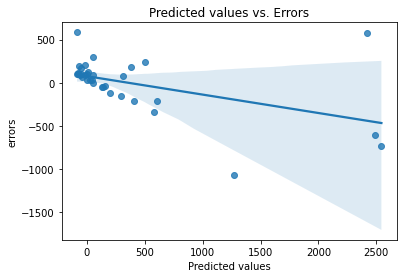

In [ ]:
print_resids(no_endog_results.predict(), no_endog_results.resid)

the descriptive statistics for the errors and a histogram of them:

 count    3.400000e+01
mean    -2.033406e-13
std      3.205401e+02
min     -1.075177e+03
25%     -4.732558e+01
50%      8.322314e+01
75%      1.188709e+02
max      5.859840e+02
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


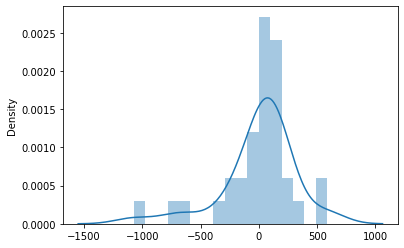

In [ ]:
print ("the descriptive statistics for the errors and a histogram of them:\n\n", no_endog_results.resid.describe())
sns.distplot(no_endog_results.resid);